# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')
num_data = data_train.shape[0]

## plot the data

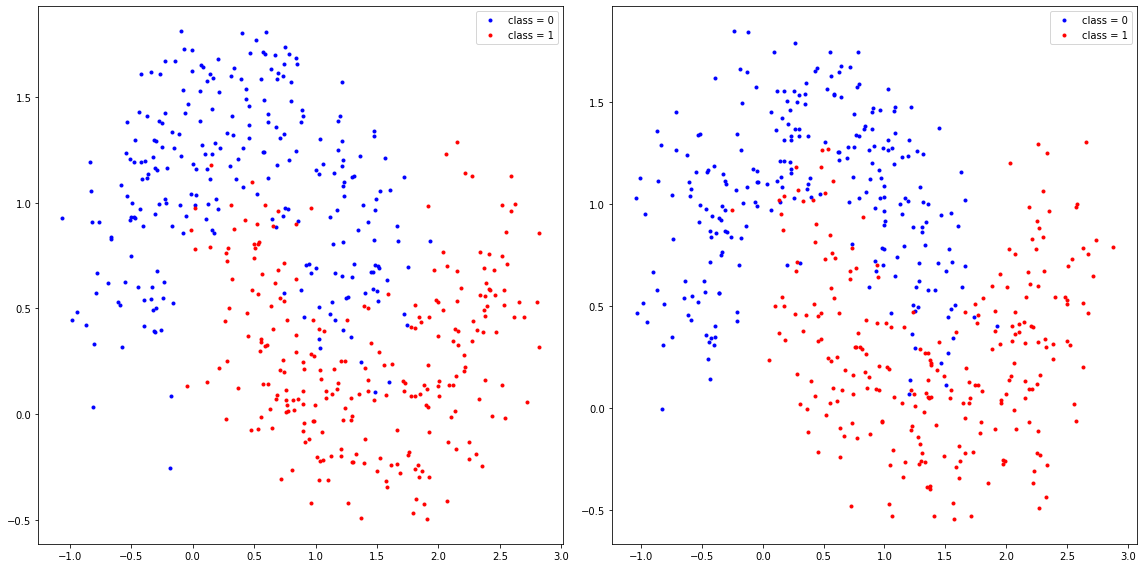

In [3]:
x_1_0 = np.zeros(250)
y_1_0 = np.zeros(250)
for i in range(250):
    x_1_0[i] = data_train[i][0]
    y_1_0[i] = data_train[i][1]
x_1_1 = np.zeros(250)
y_1_1 = np.zeros(250)
for i in range(250):
    x_1_1[i] = data_train[i+250][0]
    y_1_1[i] = data_train[i+250][1]
    
x_2_0 = np.zeros(250)
y_2_0 = np.zeros(250)
for i in range(250):
    x_2_0[i] = data_test[i][0]

    y_2_0[i] = data_test[i][1]
x_2_1 = np.zeros(250)
y_2_1 = np.zeros(250)
for i in range(250):
    x_2_1[i] = data_test[i+250][0]
    y_2_1[i] = data_test[i+250][1]

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(x_1_0, y_1_0,'.', color='blue', label = 'class = 0')
plt.plot(x_1_1, y_1_1,'.', color='red', label = 'class = 1')
plt.legend()

plt.subplot(122)
plt.plot(x_2_0, y_2_0, '.', color = 'blue', label = 'class = 0')
plt.plot(x_2_1, y_2_1, '.', color = 'red', label = 'class = 1')
plt.legend()




plt.tight_layout()
plt.show()

## define feature function

In [4]:
x_train = np.zeros(num_data)
y_train = np.zeros(num_data)
label_train = np.zeros(num_data)
for i in range(num_data):
    x_train[i] = data_train[i][0]
    y_train[i] = data_train[i][1]
    label_train[i] = data_train[i][2]

In [5]:
x_test = np.zeros(num_data)
y_test = np.zeros(num_data)
label_test = np.zeros(num_data)
for i in range(num_data):
    x_test[i] = data_test[i][0]
    y_test[i] = data_test[i][1]
    label_test[i] = data_test[i][2]

In [34]:
def feature_function(x, y):
    feature = []
    feature.append(1.5)
    feature.append(x)
    feature.append(x**2)
    feature.append(x**3)
    feature.append(np.cos(x))
    feature.append(y)
    feature = np.array(feature)
    return feature

In [35]:
f_train = []
for i in range(num_data):
    val = feature_function(x_train[i], y_train[i])
    f_train.append(val)
f_train = np.array(f_train) 
f_train = f_train.T

In [36]:
f_test = []
for i in range(num_data):
    val_2 = feature_function(x_test[i], y_test[i])
    f_test.append(val_2)
f_test = np.array(f_test)
f_test = f_test.T

In [37]:
f_train.shape

(6, 500)

## define regression function based on the feature function

In [38]:
def regression_function(theta, feature):
    value = np.matmul(theta.T,feature)
    return value

## define regularization function on the model parameters

In [39]:
def regularization_function(theta, alpha):
    value = (alpha/2) * np.matmul(theta.T, theta)
    return value

## define sigmoid function

In [40]:
def logistic_function(theta, feature):
    val = regression_function(theta, feature)
    z = 1/(1 + np.exp(-val))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [41]:
def compute_loss_feature(theta, feature, label, alpha):
    
    z = logistic_function(theta, feature)
    loss = (-label * np.log(z + np.finfo(float).eps)) - (1-label)*np.log(1-z + np.finfo(float).eps)
    loss = sum(loss)/num_data + regularization_function(theta, alpha)
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [42]:
def compute_gradient_feature(theta, feature, label, alpha):
    
    z = logistic_function(theta, feature)
    grad=(1/num_data) * np.matmul(feature, (z-label))
    
    return grad

In [62]:
f_train.shape

(6, 500)

In [63]:
theta.shape

(6,)

## compute the accuracy

In [43]:
def compute_accuracy(theta, feature, label):
    val = np.matmul(theta.T,feature)
    z = 1/(1 + np.exp(-val)) 
    result = []
    for i in range(num_data):
        if z[i] >= 0.5:
            z[i] = 1
        else:
            z[i] = 0
    for i in range(num_data):
        if z[i] != label[i]:
            result.append(0)
        else:
            result.append(1)
    accuracy = sum(result)/len(result)
    return accuracy

## gradient descent for the model parameters $\theta$

In [59]:
num_iteration   = 20000    
learning_rate   = 0.1
alpha           = 0.0001
theta = np.array((0,0,0,0,0,0))



In [60]:
theta_iteration             = np.zeros((num_iteration, 6))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [61]:
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient_feature(theta ,f_train,label_train, alpha)
    loss    = compute_loss_feature(theta, f_train, label_train, alpha)
    loss_test = compute_loss_feature(theta, f_test, label_test, alpha)
    accuracy_train = compute_accuracy(theta, f_train, label_train)
    accuracy_test = compute_accuracy(theta, f_test, label_test)
    
    
    theta_iteration[i] = theta
    loss_iteration_train[i]   = loss
    loss_iteration_test[i] = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i] = accuracy_test
    
    print("[%d], loss = %5.5f, loss(test) = %5.5f, accuracy(train) = %.5f, accuracy(test) = %.5f" % (i, loss, loss_test, accuracy_train, accuracy_test))

[0], loss = 0.59741, loss(test) = 0.59586, accuracy(train) = 0.73800, accuracy(test) = 0.71600
[1], loss = 0.58165, loss(test) = 0.57976, accuracy(train) = 0.74200, accuracy(test) = 0.70800
[2], loss = 0.57040, loss(test) = 0.56839, accuracy(train) = 0.74200, accuracy(test) = 0.71200
[3], loss = 0.56098, loss(test) = 0.55895, accuracy(train) = 0.74400, accuracy(test) = 0.71200
[4], loss = 0.55270, loss(test) = 0.55069, accuracy(train) = 0.73200, accuracy(test) = 0.71800
[5], loss = 0.54526, loss(test) = 0.54331, accuracy(train) = 0.72800, accuracy(test) = 0.71600
[6], loss = 0.53854, loss(test) = 0.53664, accuracy(train) = 0.72200, accuracy(test) = 0.72200
[7], loss = 0.53241, loss(test) = 0.53058, accuracy(train) = 0.73000, accuracy(test) = 0.73200
[8], loss = 0.52681, loss(test) = 0.52506, accuracy(train) = 0.72600, accuracy(test) = 0.73400
[9], loss = 0.52167, loss(test) = 0.52000, accuracy(train) = 0.72200, accuracy(test) = 0.73000
[10], loss = 0.51694, loss(test) = 0.51534, accura

[173], loss = 0.36545, loss(test) = 0.37299, accuracy(train) = 0.83200, accuracy(test) = 0.83800
[174], loss = 0.36506, loss(test) = 0.37263, accuracy(train) = 0.83200, accuracy(test) = 0.83800
[175], loss = 0.36467, loss(test) = 0.37227, accuracy(train) = 0.83200, accuracy(test) = 0.83800
[176], loss = 0.36428, loss(test) = 0.37192, accuracy(train) = 0.83200, accuracy(test) = 0.83800
[177], loss = 0.36390, loss(test) = 0.37157, accuracy(train) = 0.83200, accuracy(test) = 0.84000
[178], loss = 0.36352, loss(test) = 0.37122, accuracy(train) = 0.83200, accuracy(test) = 0.84000
[179], loss = 0.36314, loss(test) = 0.37087, accuracy(train) = 0.83400, accuracy(test) = 0.84000
[180], loss = 0.36276, loss(test) = 0.37052, accuracy(train) = 0.83400, accuracy(test) = 0.84000
[181], loss = 0.36239, loss(test) = 0.37018, accuracy(train) = 0.83400, accuracy(test) = 0.84000
[182], loss = 0.36201, loss(test) = 0.36984, accuracy(train) = 0.83400, accuracy(test) = 0.84000
[183], loss = 0.36164, loss(te

[341], loss = 0.32169, loss(test) = 0.33266, accuracy(train) = 0.86000, accuracy(test) = 0.86000
[342], loss = 0.32152, loss(test) = 0.33250, accuracy(train) = 0.86000, accuracy(test) = 0.86000
[343], loss = 0.32134, loss(test) = 0.33233, accuracy(train) = 0.86000, accuracy(test) = 0.86000
[344], loss = 0.32117, loss(test) = 0.33217, accuracy(train) = 0.86000, accuracy(test) = 0.86000
[345], loss = 0.32100, loss(test) = 0.33201, accuracy(train) = 0.86000, accuracy(test) = 0.86200
[346], loss = 0.32083, loss(test) = 0.33186, accuracy(train) = 0.86000, accuracy(test) = 0.86200
[347], loss = 0.32066, loss(test) = 0.33170, accuracy(train) = 0.86000, accuracy(test) = 0.86200
[348], loss = 0.32049, loss(test) = 0.33154, accuracy(train) = 0.86000, accuracy(test) = 0.86200
[349], loss = 0.32032, loss(test) = 0.33138, accuracy(train) = 0.86000, accuracy(test) = 0.86200
[350], loss = 0.32015, loss(test) = 0.33122, accuracy(train) = 0.86000, accuracy(test) = 0.86200
[351], loss = 0.31998, loss(te

[516], loss = 0.29883, loss(test) = 0.31108, accuracy(train) = 0.86600, accuracy(test) = 0.87200
[517], loss = 0.29873, loss(test) = 0.31099, accuracy(train) = 0.86600, accuracy(test) = 0.87200
[518], loss = 0.29863, loss(test) = 0.31090, accuracy(train) = 0.86800, accuracy(test) = 0.87200
[519], loss = 0.29853, loss(test) = 0.31080, accuracy(train) = 0.86800, accuracy(test) = 0.87200
[520], loss = 0.29843, loss(test) = 0.31071, accuracy(train) = 0.86800, accuracy(test) = 0.87200
[521], loss = 0.29833, loss(test) = 0.31061, accuracy(train) = 0.86800, accuracy(test) = 0.87400
[522], loss = 0.29824, loss(test) = 0.31052, accuracy(train) = 0.86800, accuracy(test) = 0.87400
[523], loss = 0.29814, loss(test) = 0.31043, accuracy(train) = 0.86800, accuracy(test) = 0.87400
[524], loss = 0.29804, loss(test) = 0.31033, accuracy(train) = 0.86800, accuracy(test) = 0.87400
[525], loss = 0.29795, loss(test) = 0.31024, accuracy(train) = 0.86800, accuracy(test) = 0.87400
[526], loss = 0.29785, loss(te

[687], loss = 0.28498, loss(test) = 0.29761, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[688], loss = 0.28491, loss(test) = 0.29754, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[689], loss = 0.28484, loss(test) = 0.29748, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[690], loss = 0.28478, loss(test) = 0.29741, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[691], loss = 0.28471, loss(test) = 0.29734, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[692], loss = 0.28464, loss(test) = 0.29728, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[693], loss = 0.28458, loss(test) = 0.29721, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[694], loss = 0.28451, loss(test) = 0.29715, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[695], loss = 0.28445, loss(test) = 0.29708, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[696], loss = 0.28438, loss(test) = 0.29702, accuracy(train) = 0.87400, accuracy(test) = 0.88000
[697], loss = 0.28432, loss(te

[858], loss = 0.27521, loss(test) = 0.28781, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[859], loss = 0.27517, loss(test) = 0.28776, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[860], loss = 0.27512, loss(test) = 0.28771, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[861], loss = 0.27507, loss(test) = 0.28766, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[862], loss = 0.27502, loss(test) = 0.28761, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[863], loss = 0.27497, loss(test) = 0.28756, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[864], loss = 0.27492, loss(test) = 0.28751, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[865], loss = 0.27487, loss(test) = 0.28746, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[866], loss = 0.27482, loss(test) = 0.28741, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[867], loss = 0.27478, loss(test) = 0.28736, accuracy(train) = 0.88200, accuracy(test) = 0.88600
[868], loss = 0.27473, loss(te

[1011], loss = 0.26850, loss(test) = 0.28087, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1012], loss = 0.26846, loss(test) = 0.28083, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1013], loss = 0.26842, loss(test) = 0.28079, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1014], loss = 0.26838, loss(test) = 0.28075, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1015], loss = 0.26834, loss(test) = 0.28071, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1016], loss = 0.26830, loss(test) = 0.28067, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1017], loss = 0.26826, loss(test) = 0.28063, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1018], loss = 0.26822, loss(test) = 0.28059, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1019], loss = 0.26819, loss(test) = 0.28055, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1020], loss = 0.26815, loss(test) = 0.28051, accuracy(train) = 0.88200, accuracy(test) = 0.89000
[1021], loss = 0.268

[1179], loss = 0.26253, loss(test) = 0.27457, accuracy(train) = 0.88400, accuracy(test) = 0.89200
[1180], loss = 0.26250, loss(test) = 0.27453, accuracy(train) = 0.88400, accuracy(test) = 0.89200
[1181], loss = 0.26247, loss(test) = 0.27450, accuracy(train) = 0.88400, accuracy(test) = 0.89200
[1182], loss = 0.26244, loss(test) = 0.27446, accuracy(train) = 0.88400, accuracy(test) = 0.89200
[1183], loss = 0.26241, loss(test) = 0.27443, accuracy(train) = 0.88400, accuracy(test) = 0.89200
[1184], loss = 0.26237, loss(test) = 0.27439, accuracy(train) = 0.88400, accuracy(test) = 0.89200
[1185], loss = 0.26234, loss(test) = 0.27436, accuracy(train) = 0.88400, accuracy(test) = 0.89200
[1186], loss = 0.26231, loss(test) = 0.27433, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1187], loss = 0.26228, loss(test) = 0.27429, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1188], loss = 0.26225, loss(test) = 0.27426, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1189], loss = 0.262

[1349], loss = 0.25753, loss(test) = 0.26916, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1350], loss = 0.25751, loss(test) = 0.26913, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1351], loss = 0.25748, loss(test) = 0.26910, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1352], loss = 0.25745, loss(test) = 0.26907, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1353], loss = 0.25743, loss(test) = 0.26904, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1354], loss = 0.25740, loss(test) = 0.26901, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1355], loss = 0.25737, loss(test) = 0.26898, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1356], loss = 0.25735, loss(test) = 0.26896, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1357], loss = 0.25732, loss(test) = 0.26893, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1358], loss = 0.25729, loss(test) = 0.26890, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1359], loss = 0.257

[1520], loss = 0.25326, loss(test) = 0.26445, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1521], loss = 0.25323, loss(test) = 0.26442, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1522], loss = 0.25321, loss(test) = 0.26440, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1523], loss = 0.25319, loss(test) = 0.26437, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1524], loss = 0.25316, loss(test) = 0.26435, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1525], loss = 0.25314, loss(test) = 0.26432, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1526], loss = 0.25312, loss(test) = 0.26430, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1527], loss = 0.25309, loss(test) = 0.26427, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1528], loss = 0.25307, loss(test) = 0.26424, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1529], loss = 0.25305, loss(test) = 0.26422, accuracy(train) = 0.88000, accuracy(test) = 0.89400
[1530], loss = 0.253

[1691], loss = 0.24954, loss(test) = 0.26029, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1692], loss = 0.24952, loss(test) = 0.26027, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1693], loss = 0.24950, loss(test) = 0.26025, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1694], loss = 0.24948, loss(test) = 0.26023, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1695], loss = 0.24946, loss(test) = 0.26020, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1696], loss = 0.24944, loss(test) = 0.26018, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1697], loss = 0.24942, loss(test) = 0.26016, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1698], loss = 0.24940, loss(test) = 0.26013, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1699], loss = 0.24938, loss(test) = 0.26011, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1700], loss = 0.24936, loss(test) = 0.26009, accuracy(train) = 0.88200, accuracy(test) = 0.89200
[1701], loss = 0.249

[1864], loss = 0.24622, loss(test) = 0.25654, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1865], loss = 0.24621, loss(test) = 0.25652, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1866], loss = 0.24619, loss(test) = 0.25649, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1867], loss = 0.24617, loss(test) = 0.25647, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1868], loss = 0.24615, loss(test) = 0.25645, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1869], loss = 0.24613, loss(test) = 0.25643, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1870], loss = 0.24612, loss(test) = 0.25641, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1871], loss = 0.24610, loss(test) = 0.25639, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1872], loss = 0.24608, loss(test) = 0.25637, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1873], loss = 0.24606, loss(test) = 0.25635, accuracy(train) = 0.88200, accuracy(test) = 0.89400
[1874], loss = 0.246

[2040], loss = 0.24321, loss(test) = 0.25309, accuracy(train) = 0.88400, accuracy(test) = 0.89600
[2041], loss = 0.24319, loss(test) = 0.25307, accuracy(train) = 0.88400, accuracy(test) = 0.89600
[2042], loss = 0.24318, loss(test) = 0.25305, accuracy(train) = 0.88400, accuracy(test) = 0.89600
[2043], loss = 0.24316, loss(test) = 0.25303, accuracy(train) = 0.88400, accuracy(test) = 0.89600
[2044], loss = 0.24314, loss(test) = 0.25301, accuracy(train) = 0.88400, accuracy(test) = 0.89600
[2045], loss = 0.24313, loss(test) = 0.25299, accuracy(train) = 0.88400, accuracy(test) = 0.89600
[2046], loss = 0.24311, loss(test) = 0.25297, accuracy(train) = 0.88600, accuracy(test) = 0.89600
[2047], loss = 0.24309, loss(test) = 0.25296, accuracy(train) = 0.88600, accuracy(test) = 0.89600
[2048], loss = 0.24308, loss(test) = 0.25294, accuracy(train) = 0.88600, accuracy(test) = 0.89600
[2049], loss = 0.24306, loss(test) = 0.25292, accuracy(train) = 0.88600, accuracy(test) = 0.89600
[2050], loss = 0.243

[2208], loss = 0.24060, loss(test) = 0.25008, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2209], loss = 0.24059, loss(test) = 0.25006, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2210], loss = 0.24057, loss(test) = 0.25005, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2211], loss = 0.24056, loss(test) = 0.25003, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2212], loss = 0.24055, loss(test) = 0.25001, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2213], loss = 0.24053, loss(test) = 0.25000, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2214], loss = 0.24052, loss(test) = 0.24998, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2215], loss = 0.24050, loss(test) = 0.24996, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2216], loss = 0.24049, loss(test) = 0.24995, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2217], loss = 0.24047, loss(test) = 0.24993, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2218], loss = 0.240

[2381], loss = 0.23815, loss(test) = 0.24724, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2382], loss = 0.23814, loss(test) = 0.24722, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2383], loss = 0.23813, loss(test) = 0.24721, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2384], loss = 0.23811, loss(test) = 0.24719, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2385], loss = 0.23810, loss(test) = 0.24718, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2386], loss = 0.23809, loss(test) = 0.24716, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2387], loss = 0.23807, loss(test) = 0.24715, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2388], loss = 0.23806, loss(test) = 0.24713, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2389], loss = 0.23805, loss(test) = 0.24711, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2390], loss = 0.23803, loss(test) = 0.24710, accuracy(train) = 0.89200, accuracy(test) = 0.90000
[2391], loss = 0.238

[2551], loss = 0.23594, loss(test) = 0.24466, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2552], loss = 0.23593, loss(test) = 0.24464, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2553], loss = 0.23591, loss(test) = 0.24463, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2554], loss = 0.23590, loss(test) = 0.24461, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2555], loss = 0.23589, loss(test) = 0.24460, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2556], loss = 0.23588, loss(test) = 0.24459, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2557], loss = 0.23586, loss(test) = 0.24457, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2558], loss = 0.23585, loss(test) = 0.24456, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2559], loss = 0.23584, loss(test) = 0.24454, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2560], loss = 0.23583, loss(test) = 0.24453, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2561], loss = 0.235

[2719], loss = 0.23391, loss(test) = 0.24229, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2720], loss = 0.23390, loss(test) = 0.24227, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2721], loss = 0.23389, loss(test) = 0.24226, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2722], loss = 0.23388, loss(test) = 0.24225, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2723], loss = 0.23386, loss(test) = 0.24223, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2724], loss = 0.23385, loss(test) = 0.24222, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2725], loss = 0.23384, loss(test) = 0.24221, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2726], loss = 0.23383, loss(test) = 0.24219, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2727], loss = 0.23382, loss(test) = 0.24218, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2728], loss = 0.23381, loss(test) = 0.24217, accuracy(train) = 0.89400, accuracy(test) = 0.90000
[2729], loss = 0.233

[2883], loss = 0.23207, loss(test) = 0.24012, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2884], loss = 0.23205, loss(test) = 0.24011, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2885], loss = 0.23204, loss(test) = 0.24010, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2886], loss = 0.23203, loss(test) = 0.24009, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2887], loss = 0.23202, loss(test) = 0.24007, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2888], loss = 0.23201, loss(test) = 0.24006, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2889], loss = 0.23200, loss(test) = 0.24005, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2890], loss = 0.23199, loss(test) = 0.24004, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2891], loss = 0.23198, loss(test) = 0.24002, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2892], loss = 0.23197, loss(test) = 0.24001, accuracy(train) = 0.89400, accuracy(test) = 0.89600
[2893], loss = 0.231

[3050], loss = 0.23030, loss(test) = 0.23806, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3051], loss = 0.23029, loss(test) = 0.23805, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3052], loss = 0.23028, loss(test) = 0.23803, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3053], loss = 0.23027, loss(test) = 0.23802, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3054], loss = 0.23026, loss(test) = 0.23801, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3055], loss = 0.23025, loss(test) = 0.23800, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3056], loss = 0.23024, loss(test) = 0.23799, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3057], loss = 0.23023, loss(test) = 0.23797, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3058], loss = 0.23022, loss(test) = 0.23796, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3059], loss = 0.23021, loss(test) = 0.23795, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3060], loss = 0.230

[3217], loss = 0.22865, loss(test) = 0.23612, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3218], loss = 0.22864, loss(test) = 0.23611, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3219], loss = 0.22863, loss(test) = 0.23609, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3220], loss = 0.22862, loss(test) = 0.23608, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3221], loss = 0.22861, loss(test) = 0.23607, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3222], loss = 0.22860, loss(test) = 0.23606, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3223], loss = 0.22859, loss(test) = 0.23605, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3224], loss = 0.22858, loss(test) = 0.23604, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3225], loss = 0.22857, loss(test) = 0.23603, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3226], loss = 0.22856, loss(test) = 0.23602, accuracy(train) = 0.89400, accuracy(test) = 0.89800
[3227], loss = 0.228

[3392], loss = 0.22702, loss(test) = 0.23420, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3393], loss = 0.22701, loss(test) = 0.23419, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3394], loss = 0.22700, loss(test) = 0.23418, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3395], loss = 0.22699, loss(test) = 0.23417, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3396], loss = 0.22698, loss(test) = 0.23416, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3397], loss = 0.22697, loss(test) = 0.23415, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3398], loss = 0.22696, loss(test) = 0.23414, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3399], loss = 0.22695, loss(test) = 0.23413, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3400], loss = 0.22694, loss(test) = 0.23412, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3401], loss = 0.22694, loss(test) = 0.23411, accuracy(train) = 0.89800, accuracy(test) = 0.89800
[3402], loss = 0.226

[3565], loss = 0.22549, loss(test) = 0.23242, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3566], loss = 0.22549, loss(test) = 0.23241, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3567], loss = 0.22548, loss(test) = 0.23240, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3568], loss = 0.22547, loss(test) = 0.23239, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3569], loss = 0.22546, loss(test) = 0.23238, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3570], loss = 0.22545, loss(test) = 0.23236, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3571], loss = 0.22544, loss(test) = 0.23235, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3572], loss = 0.22543, loss(test) = 0.23234, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3573], loss = 0.22543, loss(test) = 0.23233, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3574], loss = 0.22542, loss(test) = 0.23232, accuracy(train) = 0.90000, accuracy(test) = 0.89800
[3575], loss = 0.225

[3739], loss = 0.22404, loss(test) = 0.23072, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3740], loss = 0.22404, loss(test) = 0.23071, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3741], loss = 0.22403, loss(test) = 0.23070, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3742], loss = 0.22402, loss(test) = 0.23069, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3743], loss = 0.22401, loss(test) = 0.23068, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3744], loss = 0.22400, loss(test) = 0.23067, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3745], loss = 0.22400, loss(test) = 0.23066, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3746], loss = 0.22399, loss(test) = 0.23065, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3747], loss = 0.22398, loss(test) = 0.23064, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3748], loss = 0.22397, loss(test) = 0.23063, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3749], loss = 0.223

[3908], loss = 0.22271, loss(test) = 0.22916, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3909], loss = 0.22270, loss(test) = 0.22915, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3910], loss = 0.22269, loss(test) = 0.22914, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3911], loss = 0.22269, loss(test) = 0.22913, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3912], loss = 0.22268, loss(test) = 0.22912, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3913], loss = 0.22267, loss(test) = 0.22911, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3914], loss = 0.22266, loss(test) = 0.22910, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3915], loss = 0.22266, loss(test) = 0.22909, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3916], loss = 0.22265, loss(test) = 0.22908, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3917], loss = 0.22264, loss(test) = 0.22908, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[3918], loss = 0.222

[4079], loss = 0.22142, loss(test) = 0.22766, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4080], loss = 0.22142, loss(test) = 0.22765, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4081], loss = 0.22141, loss(test) = 0.22764, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4082], loss = 0.22140, loss(test) = 0.22763, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4083], loss = 0.22139, loss(test) = 0.22762, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4084], loss = 0.22139, loss(test) = 0.22761, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4085], loss = 0.22138, loss(test) = 0.22760, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4086], loss = 0.22137, loss(test) = 0.22760, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4087], loss = 0.22136, loss(test) = 0.22759, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4088], loss = 0.22136, loss(test) = 0.22758, accuracy(train) = 0.90200, accuracy(test) = 0.89800
[4089], loss = 0.221

[4249], loss = 0.22020, loss(test) = 0.22624, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4250], loss = 0.22020, loss(test) = 0.22623, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4251], loss = 0.22019, loss(test) = 0.22622, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4252], loss = 0.22018, loss(test) = 0.22621, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4253], loss = 0.22018, loss(test) = 0.22621, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4254], loss = 0.22017, loss(test) = 0.22620, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4255], loss = 0.22016, loss(test) = 0.22619, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4256], loss = 0.22016, loss(test) = 0.22618, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4257], loss = 0.22015, loss(test) = 0.22617, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4258], loss = 0.22014, loss(test) = 0.22616, accuracy(train) = 0.90600, accuracy(test) = 0.89800
[4259], loss = 0.220

[4418], loss = 0.21905, loss(test) = 0.22490, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4419], loss = 0.21904, loss(test) = 0.22489, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4420], loss = 0.21903, loss(test) = 0.22488, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4421], loss = 0.21903, loss(test) = 0.22487, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4422], loss = 0.21902, loss(test) = 0.22486, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4423], loss = 0.21901, loss(test) = 0.22486, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4424], loss = 0.21901, loss(test) = 0.22485, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4425], loss = 0.21900, loss(test) = 0.22484, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4426], loss = 0.21899, loss(test) = 0.22483, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4427], loss = 0.21899, loss(test) = 0.22483, accuracy(train) = 0.90400, accuracy(test) = 0.90200
[4428], loss = 0.218

[4596], loss = 0.21788, loss(test) = 0.22355, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4597], loss = 0.21788, loss(test) = 0.22354, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4598], loss = 0.21787, loss(test) = 0.22353, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4599], loss = 0.21786, loss(test) = 0.22353, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4600], loss = 0.21786, loss(test) = 0.22352, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4601], loss = 0.21785, loss(test) = 0.22351, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4602], loss = 0.21785, loss(test) = 0.22350, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4603], loss = 0.21784, loss(test) = 0.22350, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4604], loss = 0.21783, loss(test) = 0.22349, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4605], loss = 0.21783, loss(test) = 0.22348, accuracy(train) = 0.90600, accuracy(test) = 0.90400
[4606], loss = 0.217

[4771], loss = 0.21679, loss(test) = 0.22229, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4772], loss = 0.21678, loss(test) = 0.22228, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4773], loss = 0.21678, loss(test) = 0.22227, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4774], loss = 0.21677, loss(test) = 0.22226, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4775], loss = 0.21676, loss(test) = 0.22226, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4776], loss = 0.21676, loss(test) = 0.22225, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4777], loss = 0.21675, loss(test) = 0.22224, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4778], loss = 0.21675, loss(test) = 0.22224, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4779], loss = 0.21674, loss(test) = 0.22223, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4780], loss = 0.21673, loss(test) = 0.22222, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[4781], loss = 0.216

[4942], loss = 0.21576, loss(test) = 0.22111, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4943], loss = 0.21576, loss(test) = 0.22110, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4944], loss = 0.21575, loss(test) = 0.22109, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4945], loss = 0.21575, loss(test) = 0.22109, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4946], loss = 0.21574, loss(test) = 0.22108, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4947], loss = 0.21574, loss(test) = 0.22107, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4948], loss = 0.21573, loss(test) = 0.22107, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4949], loss = 0.21572, loss(test) = 0.22106, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4950], loss = 0.21572, loss(test) = 0.22105, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4951], loss = 0.21571, loss(test) = 0.22105, accuracy(train) = 0.90800, accuracy(test) = 0.90800
[4952], loss = 0.215

[5116], loss = 0.21476, loss(test) = 0.21996, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5117], loss = 0.21476, loss(test) = 0.21995, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5118], loss = 0.21475, loss(test) = 0.21995, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5119], loss = 0.21475, loss(test) = 0.21994, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5120], loss = 0.21474, loss(test) = 0.21994, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5121], loss = 0.21474, loss(test) = 0.21993, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5122], loss = 0.21473, loss(test) = 0.21992, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5123], loss = 0.21473, loss(test) = 0.21992, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5124], loss = 0.21472, loss(test) = 0.21991, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5125], loss = 0.21471, loss(test) = 0.21990, accuracy(train) = 0.90600, accuracy(test) = 0.90800
[5126], loss = 0.214

[5293], loss = 0.21379, loss(test) = 0.21885, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5294], loss = 0.21378, loss(test) = 0.21884, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5295], loss = 0.21378, loss(test) = 0.21883, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5296], loss = 0.21377, loss(test) = 0.21883, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5297], loss = 0.21377, loss(test) = 0.21882, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5298], loss = 0.21376, loss(test) = 0.21882, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5299], loss = 0.21376, loss(test) = 0.21881, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5300], loss = 0.21375, loss(test) = 0.21880, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5301], loss = 0.21374, loss(test) = 0.21880, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5302], loss = 0.21374, loss(test) = 0.21879, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5303], loss = 0.213

[5469], loss = 0.21285, loss(test) = 0.21779, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5470], loss = 0.21285, loss(test) = 0.21778, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5471], loss = 0.21284, loss(test) = 0.21777, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5472], loss = 0.21284, loss(test) = 0.21777, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5473], loss = 0.21283, loss(test) = 0.21776, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5474], loss = 0.21283, loss(test) = 0.21776, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5475], loss = 0.21282, loss(test) = 0.21775, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5476], loss = 0.21282, loss(test) = 0.21774, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5477], loss = 0.21281, loss(test) = 0.21774, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5478], loss = 0.21281, loss(test) = 0.21773, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5479], loss = 0.212

[5642], loss = 0.21197, loss(test) = 0.21679, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5643], loss = 0.21197, loss(test) = 0.21678, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5644], loss = 0.21196, loss(test) = 0.21678, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5645], loss = 0.21196, loss(test) = 0.21677, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5646], loss = 0.21195, loss(test) = 0.21676, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5647], loss = 0.21195, loss(test) = 0.21676, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5648], loss = 0.21194, loss(test) = 0.21675, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5649], loss = 0.21194, loss(test) = 0.21675, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5650], loss = 0.21193, loss(test) = 0.21674, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5651], loss = 0.21193, loss(test) = 0.21674, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5652], loss = 0.211

[5816], loss = 0.21112, loss(test) = 0.21582, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5817], loss = 0.21111, loss(test) = 0.21582, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5818], loss = 0.21111, loss(test) = 0.21581, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5819], loss = 0.21110, loss(test) = 0.21581, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5820], loss = 0.21110, loss(test) = 0.21580, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5821], loss = 0.21109, loss(test) = 0.21580, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5822], loss = 0.21109, loss(test) = 0.21579, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5823], loss = 0.21108, loss(test) = 0.21579, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5824], loss = 0.21108, loss(test) = 0.21578, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5825], loss = 0.21108, loss(test) = 0.21577, accuracy(train) = 0.90600, accuracy(test) = 0.91000
[5826], loss = 0.211

[5988], loss = 0.21030, loss(test) = 0.21491, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5989], loss = 0.21030, loss(test) = 0.21490, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5990], loss = 0.21030, loss(test) = 0.21490, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5991], loss = 0.21029, loss(test) = 0.21489, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5992], loss = 0.21029, loss(test) = 0.21489, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5993], loss = 0.21028, loss(test) = 0.21488, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5994], loss = 0.21028, loss(test) = 0.21488, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5995], loss = 0.21027, loss(test) = 0.21487, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5996], loss = 0.21027, loss(test) = 0.21487, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5997], loss = 0.21026, loss(test) = 0.21486, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[5998], loss = 0.210

[6158], loss = 0.20953, loss(test) = 0.21404, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6159], loss = 0.20952, loss(test) = 0.21403, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6160], loss = 0.20952, loss(test) = 0.21403, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6161], loss = 0.20951, loss(test) = 0.21402, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6162], loss = 0.20951, loss(test) = 0.21402, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6163], loss = 0.20951, loss(test) = 0.21401, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6164], loss = 0.20950, loss(test) = 0.21401, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6165], loss = 0.20950, loss(test) = 0.21400, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6166], loss = 0.20949, loss(test) = 0.21400, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6167], loss = 0.20949, loss(test) = 0.21399, accuracy(train) = 0.90800, accuracy(test) = 0.91000
[6168], loss = 0.209

[6334], loss = 0.20875, loss(test) = 0.21318, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6335], loss = 0.20875, loss(test) = 0.21317, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6336], loss = 0.20874, loss(test) = 0.21317, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6337], loss = 0.20874, loss(test) = 0.21316, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6338], loss = 0.20873, loss(test) = 0.21316, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6339], loss = 0.20873, loss(test) = 0.21315, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6340], loss = 0.20873, loss(test) = 0.21315, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6341], loss = 0.20872, loss(test) = 0.21314, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6342], loss = 0.20872, loss(test) = 0.21314, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6343], loss = 0.20871, loss(test) = 0.21313, accuracy(train) = 0.90800, accuracy(test) = 0.91400
[6344], loss = 0.208

[6507], loss = 0.20802, loss(test) = 0.21236, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6508], loss = 0.20801, loss(test) = 0.21235, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6509], loss = 0.20801, loss(test) = 0.21235, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6510], loss = 0.20800, loss(test) = 0.21234, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6511], loss = 0.20800, loss(test) = 0.21234, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6512], loss = 0.20799, loss(test) = 0.21234, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6513], loss = 0.20799, loss(test) = 0.21233, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6514], loss = 0.20799, loss(test) = 0.21233, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6515], loss = 0.20798, loss(test) = 0.21232, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6516], loss = 0.20798, loss(test) = 0.21232, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6517], loss = 0.207

[6681], loss = 0.20730, loss(test) = 0.21157, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6682], loss = 0.20730, loss(test) = 0.21156, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6683], loss = 0.20729, loss(test) = 0.21156, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6684], loss = 0.20729, loss(test) = 0.21155, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6685], loss = 0.20728, loss(test) = 0.21155, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6686], loss = 0.20728, loss(test) = 0.21155, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6687], loss = 0.20728, loss(test) = 0.21154, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6688], loss = 0.20727, loss(test) = 0.21154, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6689], loss = 0.20727, loss(test) = 0.21153, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6690], loss = 0.20726, loss(test) = 0.21153, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6691], loss = 0.207

[6852], loss = 0.20662, loss(test) = 0.21082, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6853], loss = 0.20662, loss(test) = 0.21081, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6854], loss = 0.20661, loss(test) = 0.21081, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6855], loss = 0.20661, loss(test) = 0.21081, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6856], loss = 0.20660, loss(test) = 0.21080, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6857], loss = 0.20660, loss(test) = 0.21080, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6858], loss = 0.20660, loss(test) = 0.21079, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6859], loss = 0.20659, loss(test) = 0.21079, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6860], loss = 0.20659, loss(test) = 0.21078, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6861], loss = 0.20658, loss(test) = 0.21078, accuracy(train) = 0.91000, accuracy(test) = 0.91400
[6862], loss = 0.206

[7021], loss = 0.20597, loss(test) = 0.21011, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7022], loss = 0.20596, loss(test) = 0.21010, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7023], loss = 0.20596, loss(test) = 0.21010, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7024], loss = 0.20596, loss(test) = 0.21009, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7025], loss = 0.20595, loss(test) = 0.21009, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7026], loss = 0.20595, loss(test) = 0.21009, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7027], loss = 0.20595, loss(test) = 0.21008, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7028], loss = 0.20594, loss(test) = 0.21008, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7029], loss = 0.20594, loss(test) = 0.21007, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7030], loss = 0.20593, loss(test) = 0.21007, accuracy(train) = 0.91200, accuracy(test) = 0.91400
[7031], loss = 0.205

[7187], loss = 0.20535, loss(test) = 0.20943, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7188], loss = 0.20534, loss(test) = 0.20943, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7189], loss = 0.20534, loss(test) = 0.20942, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7190], loss = 0.20534, loss(test) = 0.20942, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7191], loss = 0.20533, loss(test) = 0.20941, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7192], loss = 0.20533, loss(test) = 0.20941, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7193], loss = 0.20533, loss(test) = 0.20941, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7194], loss = 0.20532, loss(test) = 0.20940, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7195], loss = 0.20532, loss(test) = 0.20940, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7196], loss = 0.20532, loss(test) = 0.20939, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7197], loss = 0.205

[7359], loss = 0.20473, loss(test) = 0.20875, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7360], loss = 0.20472, loss(test) = 0.20875, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7361], loss = 0.20472, loss(test) = 0.20875, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7362], loss = 0.20472, loss(test) = 0.20874, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7363], loss = 0.20471, loss(test) = 0.20874, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7364], loss = 0.20471, loss(test) = 0.20874, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7365], loss = 0.20470, loss(test) = 0.20873, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7366], loss = 0.20470, loss(test) = 0.20873, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7367], loss = 0.20470, loss(test) = 0.20872, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7368], loss = 0.20469, loss(test) = 0.20872, accuracy(train) = 0.91200, accuracy(test) = 0.91600
[7369], loss = 0.204

[7525], loss = 0.20414, loss(test) = 0.20812, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7526], loss = 0.20414, loss(test) = 0.20812, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7527], loss = 0.20414, loss(test) = 0.20812, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7528], loss = 0.20413, loss(test) = 0.20811, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7529], loss = 0.20413, loss(test) = 0.20811, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7530], loss = 0.20413, loss(test) = 0.20811, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7531], loss = 0.20412, loss(test) = 0.20810, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7532], loss = 0.20412, loss(test) = 0.20810, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7533], loss = 0.20412, loss(test) = 0.20810, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7534], loss = 0.20411, loss(test) = 0.20809, accuracy(train) = 0.91200, accuracy(test) = 0.91800
[7535], loss = 0.204

[7690], loss = 0.20358, loss(test) = 0.20752, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7691], loss = 0.20358, loss(test) = 0.20752, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7692], loss = 0.20358, loss(test) = 0.20751, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7693], loss = 0.20357, loss(test) = 0.20751, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7694], loss = 0.20357, loss(test) = 0.20751, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7695], loss = 0.20356, loss(test) = 0.20750, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7696], loss = 0.20356, loss(test) = 0.20750, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7697], loss = 0.20356, loss(test) = 0.20749, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7698], loss = 0.20355, loss(test) = 0.20749, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7699], loss = 0.20355, loss(test) = 0.20749, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7700], loss = 0.203

[7858], loss = 0.20303, loss(test) = 0.20692, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7859], loss = 0.20302, loss(test) = 0.20692, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7860], loss = 0.20302, loss(test) = 0.20692, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7861], loss = 0.20302, loss(test) = 0.20691, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7862], loss = 0.20301, loss(test) = 0.20691, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7863], loss = 0.20301, loss(test) = 0.20691, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7864], loss = 0.20301, loss(test) = 0.20690, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7865], loss = 0.20300, loss(test) = 0.20690, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7866], loss = 0.20300, loss(test) = 0.20690, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7867], loss = 0.20300, loss(test) = 0.20689, accuracy(train) = 0.91400, accuracy(test) = 0.91800
[7868], loss = 0.202

[8027], loss = 0.20248, loss(test) = 0.20635, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8028], loss = 0.20248, loss(test) = 0.20634, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8029], loss = 0.20248, loss(test) = 0.20634, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8030], loss = 0.20247, loss(test) = 0.20634, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8031], loss = 0.20247, loss(test) = 0.20633, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8032], loss = 0.20247, loss(test) = 0.20633, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8033], loss = 0.20246, loss(test) = 0.20633, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8034], loss = 0.20246, loss(test) = 0.20632, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8035], loss = 0.20246, loss(test) = 0.20632, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8036], loss = 0.20246, loss(test) = 0.20631, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8037], loss = 0.202

[8202], loss = 0.20194, loss(test) = 0.20577, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8203], loss = 0.20194, loss(test) = 0.20576, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8204], loss = 0.20193, loss(test) = 0.20576, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8205], loss = 0.20193, loss(test) = 0.20576, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8206], loss = 0.20193, loss(test) = 0.20575, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8207], loss = 0.20192, loss(test) = 0.20575, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8208], loss = 0.20192, loss(test) = 0.20575, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8209], loss = 0.20192, loss(test) = 0.20574, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8210], loss = 0.20191, loss(test) = 0.20574, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8211], loss = 0.20191, loss(test) = 0.20574, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8212], loss = 0.201

[8379], loss = 0.20140, loss(test) = 0.20520, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8380], loss = 0.20140, loss(test) = 0.20520, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8381], loss = 0.20140, loss(test) = 0.20519, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8382], loss = 0.20139, loss(test) = 0.20519, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8383], loss = 0.20139, loss(test) = 0.20519, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8384], loss = 0.20139, loss(test) = 0.20518, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8385], loss = 0.20139, loss(test) = 0.20518, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8386], loss = 0.20138, loss(test) = 0.20518, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8387], loss = 0.20138, loss(test) = 0.20517, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8388], loss = 0.20138, loss(test) = 0.20517, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8389], loss = 0.201

[8552], loss = 0.20089, loss(test) = 0.20466, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8553], loss = 0.20089, loss(test) = 0.20466, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8554], loss = 0.20089, loss(test) = 0.20466, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8555], loss = 0.20089, loss(test) = 0.20466, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8556], loss = 0.20088, loss(test) = 0.20465, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8557], loss = 0.20088, loss(test) = 0.20465, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8558], loss = 0.20088, loss(test) = 0.20465, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8559], loss = 0.20087, loss(test) = 0.20464, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8560], loss = 0.20087, loss(test) = 0.20464, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8561], loss = 0.20087, loss(test) = 0.20464, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8562], loss = 0.200

[8727], loss = 0.20040, loss(test) = 0.20414, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8728], loss = 0.20039, loss(test) = 0.20414, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8729], loss = 0.20039, loss(test) = 0.20414, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8730], loss = 0.20039, loss(test) = 0.20413, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8731], loss = 0.20038, loss(test) = 0.20413, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8732], loss = 0.20038, loss(test) = 0.20413, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8733], loss = 0.20038, loss(test) = 0.20412, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8734], loss = 0.20038, loss(test) = 0.20412, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8735], loss = 0.20037, loss(test) = 0.20412, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8736], loss = 0.20037, loss(test) = 0.20411, accuracy(train) = 0.91600, accuracy(test) = 0.91600
[8737], loss = 0.200

[8902], loss = 0.19991, loss(test) = 0.20364, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8903], loss = 0.19991, loss(test) = 0.20363, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8904], loss = 0.19991, loss(test) = 0.20363, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8905], loss = 0.19990, loss(test) = 0.20363, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8906], loss = 0.19990, loss(test) = 0.20362, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8907], loss = 0.19990, loss(test) = 0.20362, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8908], loss = 0.19989, loss(test) = 0.20362, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8909], loss = 0.19989, loss(test) = 0.20362, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8910], loss = 0.19989, loss(test) = 0.20361, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8911], loss = 0.19989, loss(test) = 0.20361, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[8912], loss = 0.199

[9075], loss = 0.19944, loss(test) = 0.20315, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9076], loss = 0.19944, loss(test) = 0.20315, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9077], loss = 0.19944, loss(test) = 0.20315, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9078], loss = 0.19944, loss(test) = 0.20314, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9079], loss = 0.19943, loss(test) = 0.20314, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9080], loss = 0.19943, loss(test) = 0.20314, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9081], loss = 0.19943, loss(test) = 0.20313, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9082], loss = 0.19943, loss(test) = 0.20313, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9083], loss = 0.19942, loss(test) = 0.20313, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9084], loss = 0.19942, loss(test) = 0.20313, accuracy(train) = 0.91600, accuracy(test) = 0.91800
[9085], loss = 0.199

[9251], loss = 0.19898, loss(test) = 0.20267, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9252], loss = 0.19898, loss(test) = 0.20267, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9253], loss = 0.19898, loss(test) = 0.20267, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9254], loss = 0.19898, loss(test) = 0.20267, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9255], loss = 0.19897, loss(test) = 0.20266, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9256], loss = 0.19897, loss(test) = 0.20266, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9257], loss = 0.19897, loss(test) = 0.20266, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9258], loss = 0.19897, loss(test) = 0.20266, accuracy(train) = 0.91800, accuracy(test) = 0.91800
[9259], loss = 0.19896, loss(test) = 0.20265, accuracy(train) = 0.92000, accuracy(test) = 0.91800
[9260], loss = 0.19896, loss(test) = 0.20265, accuracy(train) = 0.92000, accuracy(test) = 0.91800
[9261], loss = 0.198

[9427], loss = 0.19854, loss(test) = 0.20221, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9428], loss = 0.19853, loss(test) = 0.20221, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9429], loss = 0.19853, loss(test) = 0.20221, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9430], loss = 0.19853, loss(test) = 0.20220, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9431], loss = 0.19853, loss(test) = 0.20220, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9432], loss = 0.19852, loss(test) = 0.20220, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9433], loss = 0.19852, loss(test) = 0.20220, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9434], loss = 0.19852, loss(test) = 0.20219, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9435], loss = 0.19852, loss(test) = 0.20219, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9436], loss = 0.19851, loss(test) = 0.20219, accuracy(train) = 0.92000, accuracy(test) = 0.92000
[9437], loss = 0.198

[9600], loss = 0.19811, loss(test) = 0.20177, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9601], loss = 0.19811, loss(test) = 0.20177, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9602], loss = 0.19810, loss(test) = 0.20177, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9603], loss = 0.19810, loss(test) = 0.20177, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9604], loss = 0.19810, loss(test) = 0.20176, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9605], loss = 0.19810, loss(test) = 0.20176, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9606], loss = 0.19809, loss(test) = 0.20176, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9607], loss = 0.19809, loss(test) = 0.20176, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9608], loss = 0.19809, loss(test) = 0.20175, accuracy(train) = 0.92000, accuracy(test) = 0.92200
[9609], loss = 0.19809, loss(test) = 0.20175, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9610], loss = 0.198

[9773], loss = 0.19769, loss(test) = 0.20135, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9774], loss = 0.19769, loss(test) = 0.20135, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9775], loss = 0.19769, loss(test) = 0.20134, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9776], loss = 0.19768, loss(test) = 0.20134, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9777], loss = 0.19768, loss(test) = 0.20134, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9778], loss = 0.19768, loss(test) = 0.20134, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9779], loss = 0.19768, loss(test) = 0.20133, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9780], loss = 0.19767, loss(test) = 0.20133, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9781], loss = 0.19767, loss(test) = 0.20133, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9782], loss = 0.19767, loss(test) = 0.20133, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9783], loss = 0.197

[9944], loss = 0.19729, loss(test) = 0.20094, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9945], loss = 0.19729, loss(test) = 0.20094, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9946], loss = 0.19728, loss(test) = 0.20093, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9947], loss = 0.19728, loss(test) = 0.20093, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9948], loss = 0.19728, loss(test) = 0.20093, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9949], loss = 0.19728, loss(test) = 0.20093, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9950], loss = 0.19728, loss(test) = 0.20093, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9951], loss = 0.19727, loss(test) = 0.20092, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9952], loss = 0.19727, loss(test) = 0.20092, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9953], loss = 0.19727, loss(test) = 0.20092, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[9954], loss = 0.197

[10118], loss = 0.19689, loss(test) = 0.20054, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10119], loss = 0.19689, loss(test) = 0.20053, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10120], loss = 0.19689, loss(test) = 0.20053, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10121], loss = 0.19688, loss(test) = 0.20053, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10122], loss = 0.19688, loss(test) = 0.20053, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10123], loss = 0.19688, loss(test) = 0.20053, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10124], loss = 0.19688, loss(test) = 0.20052, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10125], loss = 0.19688, loss(test) = 0.20052, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10126], loss = 0.19687, loss(test) = 0.20052, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10127], loss = 0.19687, loss(test) = 0.20052, accuracy(train) = 0.92000, accuracy(test) = 0.92400
[10128], l

[10295], loss = 0.19650, loss(test) = 0.20014, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10296], loss = 0.19650, loss(test) = 0.20014, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10297], loss = 0.19649, loss(test) = 0.20014, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10298], loss = 0.19649, loss(test) = 0.20013, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10299], loss = 0.19649, loss(test) = 0.20013, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10300], loss = 0.19649, loss(test) = 0.20013, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10301], loss = 0.19648, loss(test) = 0.20013, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10302], loss = 0.19648, loss(test) = 0.20013, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10303], loss = 0.19648, loss(test) = 0.20012, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10304], loss = 0.19648, loss(test) = 0.20012, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10305], l

[10467], loss = 0.19612, loss(test) = 0.19977, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10468], loss = 0.19612, loss(test) = 0.19976, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10469], loss = 0.19612, loss(test) = 0.19976, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10470], loss = 0.19612, loss(test) = 0.19976, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10471], loss = 0.19612, loss(test) = 0.19976, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10472], loss = 0.19611, loss(test) = 0.19976, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10473], loss = 0.19611, loss(test) = 0.19975, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10474], loss = 0.19611, loss(test) = 0.19975, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10475], loss = 0.19611, loss(test) = 0.19975, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10476], loss = 0.19611, loss(test) = 0.19975, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10477], l

[10641], loss = 0.19576, loss(test) = 0.19940, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10642], loss = 0.19576, loss(test) = 0.19940, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10643], loss = 0.19575, loss(test) = 0.19940, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10644], loss = 0.19575, loss(test) = 0.19939, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10645], loss = 0.19575, loss(test) = 0.19939, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10646], loss = 0.19575, loss(test) = 0.19939, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10647], loss = 0.19574, loss(test) = 0.19939, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10648], loss = 0.19574, loss(test) = 0.19939, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10649], loss = 0.19574, loss(test) = 0.19938, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10650], loss = 0.19574, loss(test) = 0.19938, accuracy(train) = 0.92000, accuracy(test) = 0.92600
[10651], l

[10811], loss = 0.19541, loss(test) = 0.19905, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10812], loss = 0.19541, loss(test) = 0.19905, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10813], loss = 0.19540, loss(test) = 0.19905, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10814], loss = 0.19540, loss(test) = 0.19905, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10815], loss = 0.19540, loss(test) = 0.19904, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10816], loss = 0.19540, loss(test) = 0.19904, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10817], loss = 0.19540, loss(test) = 0.19904, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10818], loss = 0.19539, loss(test) = 0.19904, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10819], loss = 0.19539, loss(test) = 0.19904, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10820], loss = 0.19539, loss(test) = 0.19903, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10821], l

[10984], loss = 0.19506, loss(test) = 0.19871, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10985], loss = 0.19506, loss(test) = 0.19871, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10986], loss = 0.19506, loss(test) = 0.19870, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10987], loss = 0.19505, loss(test) = 0.19870, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10988], loss = 0.19505, loss(test) = 0.19870, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10989], loss = 0.19505, loss(test) = 0.19870, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10990], loss = 0.19505, loss(test) = 0.19870, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10991], loss = 0.19505, loss(test) = 0.19869, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10992], loss = 0.19504, loss(test) = 0.19869, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10993], loss = 0.19504, loss(test) = 0.19869, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[10994], l

[11156], loss = 0.19472, loss(test) = 0.19838, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11157], loss = 0.19472, loss(test) = 0.19837, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11158], loss = 0.19472, loss(test) = 0.19837, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11159], loss = 0.19472, loss(test) = 0.19837, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11160], loss = 0.19472, loss(test) = 0.19837, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11161], loss = 0.19471, loss(test) = 0.19837, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11162], loss = 0.19471, loss(test) = 0.19836, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11163], loss = 0.19471, loss(test) = 0.19836, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11164], loss = 0.19471, loss(test) = 0.19836, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11165], loss = 0.19471, loss(test) = 0.19836, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11166], l

[11327], loss = 0.19440, loss(test) = 0.19806, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11328], loss = 0.19440, loss(test) = 0.19805, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11329], loss = 0.19439, loss(test) = 0.19805, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11330], loss = 0.19439, loss(test) = 0.19805, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11331], loss = 0.19439, loss(test) = 0.19805, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11332], loss = 0.19439, loss(test) = 0.19805, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11333], loss = 0.19439, loss(test) = 0.19804, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11334], loss = 0.19438, loss(test) = 0.19804, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11335], loss = 0.19438, loss(test) = 0.19804, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11336], loss = 0.19438, loss(test) = 0.19804, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11337], l

[11488], loss = 0.19410, loss(test) = 0.19776, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11489], loss = 0.19410, loss(test) = 0.19776, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11490], loss = 0.19409, loss(test) = 0.19776, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11491], loss = 0.19409, loss(test) = 0.19776, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11492], loss = 0.19409, loss(test) = 0.19776, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11493], loss = 0.19409, loss(test) = 0.19775, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11494], loss = 0.19409, loss(test) = 0.19775, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11495], loss = 0.19408, loss(test) = 0.19775, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11496], loss = 0.19408, loss(test) = 0.19775, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11497], loss = 0.19408, loss(test) = 0.19775, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11498], l

[11662], loss = 0.19378, loss(test) = 0.19745, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11663], loss = 0.19378, loss(test) = 0.19745, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11664], loss = 0.19378, loss(test) = 0.19745, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11665], loss = 0.19377, loss(test) = 0.19745, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11666], loss = 0.19377, loss(test) = 0.19745, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11667], loss = 0.19377, loss(test) = 0.19745, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11668], loss = 0.19377, loss(test) = 0.19744, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11669], loss = 0.19377, loss(test) = 0.19744, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11670], loss = 0.19377, loss(test) = 0.19744, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11671], loss = 0.19376, loss(test) = 0.19744, accuracy(train) = 0.92200, accuracy(test) = 0.92600
[11672], l

[11839], loss = 0.19347, loss(test) = 0.19715, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11840], loss = 0.19346, loss(test) = 0.19715, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11841], loss = 0.19346, loss(test) = 0.19715, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11842], loss = 0.19346, loss(test) = 0.19715, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11843], loss = 0.19346, loss(test) = 0.19714, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11844], loss = 0.19346, loss(test) = 0.19714, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11845], loss = 0.19346, loss(test) = 0.19714, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11846], loss = 0.19345, loss(test) = 0.19714, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11847], loss = 0.19345, loss(test) = 0.19714, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11848], loss = 0.19345, loss(test) = 0.19714, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[11849], l

[12008], loss = 0.19317, loss(test) = 0.19687, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12009], loss = 0.19317, loss(test) = 0.19687, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12010], loss = 0.19317, loss(test) = 0.19686, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12011], loss = 0.19317, loss(test) = 0.19686, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12012], loss = 0.19317, loss(test) = 0.19686, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12013], loss = 0.19316, loss(test) = 0.19686, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12014], loss = 0.19316, loss(test) = 0.19686, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12015], loss = 0.19316, loss(test) = 0.19686, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12016], loss = 0.19316, loss(test) = 0.19685, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12017], loss = 0.19316, loss(test) = 0.19685, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12018], l

[12182], loss = 0.19288, loss(test) = 0.19659, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12183], loss = 0.19288, loss(test) = 0.19658, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12184], loss = 0.19288, loss(test) = 0.19658, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12185], loss = 0.19287, loss(test) = 0.19658, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12186], loss = 0.19287, loss(test) = 0.19658, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12187], loss = 0.19287, loss(test) = 0.19658, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12188], loss = 0.19287, loss(test) = 0.19658, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12189], loss = 0.19287, loss(test) = 0.19657, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12190], loss = 0.19287, loss(test) = 0.19657, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12191], loss = 0.19286, loss(test) = 0.19657, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12192], l

[12355], loss = 0.19259, loss(test) = 0.19631, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12356], loss = 0.19259, loss(test) = 0.19631, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12357], loss = 0.19259, loss(test) = 0.19631, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12358], loss = 0.19259, loss(test) = 0.19631, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12359], loss = 0.19259, loss(test) = 0.19631, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12360], loss = 0.19259, loss(test) = 0.19630, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12361], loss = 0.19258, loss(test) = 0.19630, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12362], loss = 0.19258, loss(test) = 0.19630, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12363], loss = 0.19258, loss(test) = 0.19630, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12364], loss = 0.19258, loss(test) = 0.19630, accuracy(train) = 0.92400, accuracy(test) = 0.92600
[12365], l

[12526], loss = 0.19232, loss(test) = 0.19605, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12527], loss = 0.19232, loss(test) = 0.19605, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12528], loss = 0.19232, loss(test) = 0.19605, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12529], loss = 0.19231, loss(test) = 0.19605, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12530], loss = 0.19231, loss(test) = 0.19604, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12531], loss = 0.19231, loss(test) = 0.19604, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12532], loss = 0.19231, loss(test) = 0.19604, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12533], loss = 0.19231, loss(test) = 0.19604, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12534], loss = 0.19231, loss(test) = 0.19604, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12535], loss = 0.19230, loss(test) = 0.19604, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12536], l

[12699], loss = 0.19205, loss(test) = 0.19579, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12700], loss = 0.19204, loss(test) = 0.19579, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12701], loss = 0.19204, loss(test) = 0.19579, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12702], loss = 0.19204, loss(test) = 0.19579, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12703], loss = 0.19204, loss(test) = 0.19579, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12704], loss = 0.19204, loss(test) = 0.19578, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12705], loss = 0.19204, loss(test) = 0.19578, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12706], loss = 0.19204, loss(test) = 0.19578, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12707], loss = 0.19203, loss(test) = 0.19578, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12708], loss = 0.19203, loss(test) = 0.19578, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[12709], l

[12875], loss = 0.19178, loss(test) = 0.19554, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12876], loss = 0.19177, loss(test) = 0.19554, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12877], loss = 0.19177, loss(test) = 0.19553, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12878], loss = 0.19177, loss(test) = 0.19553, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12879], loss = 0.19177, loss(test) = 0.19553, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12880], loss = 0.19177, loss(test) = 0.19553, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12881], loss = 0.19177, loss(test) = 0.19553, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12882], loss = 0.19177, loss(test) = 0.19553, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12883], loss = 0.19176, loss(test) = 0.19553, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12884], loss = 0.19176, loss(test) = 0.19552, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[12885], l

[13049], loss = 0.19151, loss(test) = 0.19529, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13050], loss = 0.19151, loss(test) = 0.19529, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13051], loss = 0.19151, loss(test) = 0.19529, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13052], loss = 0.19151, loss(test) = 0.19529, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13053], loss = 0.19151, loss(test) = 0.19529, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13054], loss = 0.19151, loss(test) = 0.19528, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13055], loss = 0.19151, loss(test) = 0.19528, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13056], loss = 0.19150, loss(test) = 0.19528, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13057], loss = 0.19150, loss(test) = 0.19528, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13058], loss = 0.19150, loss(test) = 0.19528, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13059], l

[13220], loss = 0.19126, loss(test) = 0.19506, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13221], loss = 0.19126, loss(test) = 0.19506, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13222], loss = 0.19126, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13223], loss = 0.19126, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13224], loss = 0.19126, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13225], loss = 0.19126, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13226], loss = 0.19126, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13227], loss = 0.19125, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13228], loss = 0.19125, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13229], loss = 0.19125, loss(test) = 0.19505, accuracy(train) = 0.92800, accuracy(test) = 0.92600
[13230], l

[13397], loss = 0.19101, loss(test) = 0.19482, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13398], loss = 0.19101, loss(test) = 0.19482, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13399], loss = 0.19101, loss(test) = 0.19482, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13400], loss = 0.19101, loss(test) = 0.19482, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13401], loss = 0.19101, loss(test) = 0.19482, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13402], loss = 0.19100, loss(test) = 0.19482, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13403], loss = 0.19100, loss(test) = 0.19481, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13404], loss = 0.19100, loss(test) = 0.19481, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13405], loss = 0.19100, loss(test) = 0.19481, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13406], loss = 0.19100, loss(test) = 0.19481, accuracy(train) = 0.92600, accuracy(test) = 0.92600
[13407], l

[13572], loss = 0.19077, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13573], loss = 0.19076, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13574], loss = 0.19076, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13575], loss = 0.19076, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13576], loss = 0.19076, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13577], loss = 0.19076, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13578], loss = 0.19076, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13579], loss = 0.19076, loss(test) = 0.19459, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13580], loss = 0.19076, loss(test) = 0.19458, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13581], loss = 0.19075, loss(test) = 0.19458, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13582], l

[13749], loss = 0.19052, loss(test) = 0.19437, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13750], loss = 0.19052, loss(test) = 0.19437, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13751], loss = 0.19052, loss(test) = 0.19437, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13752], loss = 0.19052, loss(test) = 0.19437, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13753], loss = 0.19052, loss(test) = 0.19437, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13754], loss = 0.19052, loss(test) = 0.19437, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13755], loss = 0.19052, loss(test) = 0.19436, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13756], loss = 0.19052, loss(test) = 0.19436, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13757], loss = 0.19051, loss(test) = 0.19436, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13758], loss = 0.19051, loss(test) = 0.19436, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13759], l

[13925], loss = 0.19029, loss(test) = 0.19416, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13926], loss = 0.19029, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13927], loss = 0.19029, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13928], loss = 0.19029, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13929], loss = 0.19028, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13930], loss = 0.19028, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13931], loss = 0.19028, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13932], loss = 0.19028, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13933], loss = 0.19028, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13934], loss = 0.19028, loss(test) = 0.19415, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[13935], l

[14102], loss = 0.19006, loss(test) = 0.19395, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14103], loss = 0.19006, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14104], loss = 0.19006, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14105], loss = 0.19006, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14106], loss = 0.19005, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14107], loss = 0.19005, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14108], loss = 0.19005, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14109], loss = 0.19005, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14110], loss = 0.19005, loss(test) = 0.19394, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14111], loss = 0.19005, loss(test) = 0.19393, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14112], l

[14273], loss = 0.18984, loss(test) = 0.19375, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14274], loss = 0.18984, loss(test) = 0.19375, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14275], loss = 0.18984, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14276], loss = 0.18984, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14277], loss = 0.18984, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14278], loss = 0.18983, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14279], loss = 0.18983, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14280], loss = 0.18983, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14281], loss = 0.18983, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14282], loss = 0.18983, loss(test) = 0.19374, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14283], l

[14448], loss = 0.18962, loss(test) = 0.19355, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14449], loss = 0.18962, loss(test) = 0.19355, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14450], loss = 0.18962, loss(test) = 0.19355, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14451], loss = 0.18962, loss(test) = 0.19355, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14452], loss = 0.18962, loss(test) = 0.19355, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14453], loss = 0.18962, loss(test) = 0.19354, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14454], loss = 0.18962, loss(test) = 0.19354, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14455], loss = 0.18961, loss(test) = 0.19354, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14456], loss = 0.18961, loss(test) = 0.19354, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14457], loss = 0.18961, loss(test) = 0.19354, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14458], l

[14624], loss = 0.18941, loss(test) = 0.19336, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14625], loss = 0.18941, loss(test) = 0.19336, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14626], loss = 0.18941, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14627], loss = 0.18941, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14628], loss = 0.18940, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14629], loss = 0.18940, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14630], loss = 0.18940, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14631], loss = 0.18940, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14632], loss = 0.18940, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14633], loss = 0.18940, loss(test) = 0.19335, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14634], l

[14802], loss = 0.18920, loss(test) = 0.19317, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14803], loss = 0.18920, loss(test) = 0.19317, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14804], loss = 0.18920, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14805], loss = 0.18919, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14806], loss = 0.18919, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14807], loss = 0.18919, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14808], loss = 0.18919, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14809], loss = 0.18919, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14810], loss = 0.18919, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14811], loss = 0.18919, loss(test) = 0.19316, accuracy(train) = 0.92600, accuracy(test) = 0.92800
[14812], l

[14974], loss = 0.18900, loss(test) = 0.19299, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14975], loss = 0.18900, loss(test) = 0.19299, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14976], loss = 0.18900, loss(test) = 0.19299, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14977], loss = 0.18899, loss(test) = 0.19298, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14978], loss = 0.18899, loss(test) = 0.19298, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14979], loss = 0.18899, loss(test) = 0.19298, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14980], loss = 0.18899, loss(test) = 0.19298, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14981], loss = 0.18899, loss(test) = 0.19298, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14982], loss = 0.18899, loss(test) = 0.19298, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14983], loss = 0.18899, loss(test) = 0.19298, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[14984], l

[15149], loss = 0.18880, loss(test) = 0.19281, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15150], loss = 0.18880, loss(test) = 0.19281, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15151], loss = 0.18880, loss(test) = 0.19281, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15152], loss = 0.18880, loss(test) = 0.19281, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15153], loss = 0.18879, loss(test) = 0.19281, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15154], loss = 0.18879, loss(test) = 0.19281, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15155], loss = 0.18879, loss(test) = 0.19280, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15156], loss = 0.18879, loss(test) = 0.19280, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15157], loss = 0.18879, loss(test) = 0.19280, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15158], loss = 0.18879, loss(test) = 0.19280, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15159], l

[15326], loss = 0.18860, loss(test) = 0.19264, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15327], loss = 0.18860, loss(test) = 0.19264, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15328], loss = 0.18860, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15329], loss = 0.18860, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15330], loss = 0.18860, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15331], loss = 0.18860, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15332], loss = 0.18860, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15333], loss = 0.18859, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15334], loss = 0.18859, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15335], loss = 0.18859, loss(test) = 0.19263, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15336], l

[15505], loss = 0.18841, loss(test) = 0.19247, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15506], loss = 0.18841, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15507], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15508], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15509], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15510], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15511], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15512], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15513], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15514], loss = 0.18840, loss(test) = 0.19246, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15515], l

[15678], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15679], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15680], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15681], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15682], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15683], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15684], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15685], loss = 0.18822, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15686], loss = 0.18821, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15687], loss = 0.18821, loss(test) = 0.19230, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15688], l

[15851], loss = 0.18804, loss(test) = 0.19215, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15852], loss = 0.18804, loss(test) = 0.19215, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15853], loss = 0.18804, loss(test) = 0.19215, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15854], loss = 0.18804, loss(test) = 0.19214, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15855], loss = 0.18804, loss(test) = 0.19214, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15856], loss = 0.18804, loss(test) = 0.19214, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15857], loss = 0.18804, loss(test) = 0.19214, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15858], loss = 0.18804, loss(test) = 0.19214, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15859], loss = 0.18804, loss(test) = 0.19214, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15860], loss = 0.18803, loss(test) = 0.19214, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[15861], l

[16023], loss = 0.18787, loss(test) = 0.19200, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16024], loss = 0.18787, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16025], loss = 0.18787, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16026], loss = 0.18787, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16027], loss = 0.18786, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16028], loss = 0.18786, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16029], loss = 0.18786, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16030], loss = 0.18786, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16031], loss = 0.18786, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16032], loss = 0.18786, loss(test) = 0.19199, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16033], l

[16200], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16201], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16202], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16203], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16204], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16205], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16206], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16207], loss = 0.18769, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16208], loss = 0.18768, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16209], loss = 0.18768, loss(test) = 0.19184, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16210], l

[16372], loss = 0.18752, loss(test) = 0.19170, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16373], loss = 0.18752, loss(test) = 0.19170, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16374], loss = 0.18752, loss(test) = 0.19170, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16375], loss = 0.18752, loss(test) = 0.19170, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16376], loss = 0.18752, loss(test) = 0.19170, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16377], loss = 0.18752, loss(test) = 0.19170, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16378], loss = 0.18752, loss(test) = 0.19169, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16379], loss = 0.18752, loss(test) = 0.19169, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16380], loss = 0.18752, loss(test) = 0.19169, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16381], loss = 0.18752, loss(test) = 0.19169, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16382], l

[16544], loss = 0.18736, loss(test) = 0.19156, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16545], loss = 0.18736, loss(test) = 0.19156, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16546], loss = 0.18736, loss(test) = 0.19156, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16547], loss = 0.18736, loss(test) = 0.19156, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16548], loss = 0.18736, loss(test) = 0.19156, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16549], loss = 0.18736, loss(test) = 0.19156, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16550], loss = 0.18736, loss(test) = 0.19155, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16551], loss = 0.18735, loss(test) = 0.19155, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16552], loss = 0.18735, loss(test) = 0.19155, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16553], loss = 0.18735, loss(test) = 0.19155, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16554], l

[16721], loss = 0.18720, loss(test) = 0.19142, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16722], loss = 0.18720, loss(test) = 0.19142, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16723], loss = 0.18719, loss(test) = 0.19142, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16724], loss = 0.18719, loss(test) = 0.19142, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16725], loss = 0.18719, loss(test) = 0.19142, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16726], loss = 0.18719, loss(test) = 0.19142, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16727], loss = 0.18719, loss(test) = 0.19141, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16728], loss = 0.18719, loss(test) = 0.19141, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16729], loss = 0.18719, loss(test) = 0.19141, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16730], loss = 0.18719, loss(test) = 0.19141, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16731], l

[16900], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16901], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16902], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16903], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16904], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16905], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16906], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16907], loss = 0.18703, loss(test) = 0.19128, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16908], loss = 0.18703, loss(test) = 0.19127, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16909], loss = 0.18702, loss(test) = 0.19127, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[16910], l

[17078], loss = 0.18687, loss(test) = 0.19115, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17079], loss = 0.18687, loss(test) = 0.19115, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17080], loss = 0.18687, loss(test) = 0.19115, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17081], loss = 0.18687, loss(test) = 0.19114, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17082], loss = 0.18687, loss(test) = 0.19114, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17083], loss = 0.18687, loss(test) = 0.19114, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17084], loss = 0.18687, loss(test) = 0.19114, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17085], loss = 0.18687, loss(test) = 0.19114, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17086], loss = 0.18687, loss(test) = 0.19114, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17087], loss = 0.18687, loss(test) = 0.19114, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17088], l

[17254], loss = 0.18672, loss(test) = 0.19102, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17255], loss = 0.18672, loss(test) = 0.19102, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17256], loss = 0.18672, loss(test) = 0.19102, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17257], loss = 0.18672, loss(test) = 0.19102, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17258], loss = 0.18672, loss(test) = 0.19102, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17259], loss = 0.18672, loss(test) = 0.19102, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17260], loss = 0.18672, loss(test) = 0.19101, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17261], loss = 0.18671, loss(test) = 0.19101, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17262], loss = 0.18671, loss(test) = 0.19101, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17263], loss = 0.18671, loss(test) = 0.19101, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17264], l

[17432], loss = 0.18657, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17433], loss = 0.18657, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17434], loss = 0.18657, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17435], loss = 0.18657, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17436], loss = 0.18657, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17437], loss = 0.18656, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17438], loss = 0.18656, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17439], loss = 0.18656, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17440], loss = 0.18656, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17441], loss = 0.18656, loss(test) = 0.19089, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17442], l

[17607], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17608], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17609], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17610], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17611], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17612], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17613], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17614], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17615], loss = 0.18642, loss(test) = 0.19077, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17616], loss = 0.18642, loss(test) = 0.19076, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17617], l

[17784], loss = 0.18628, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17785], loss = 0.18628, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17786], loss = 0.18628, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17787], loss = 0.18628, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17788], loss = 0.18627, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17789], loss = 0.18627, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17790], loss = 0.18627, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17791], loss = 0.18627, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17792], loss = 0.18627, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17793], loss = 0.18627, loss(test) = 0.19065, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17794], l

[17953], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17954], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17955], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17956], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17957], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17958], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17959], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17960], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17961], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17962], loss = 0.18614, loss(test) = 0.19054, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[17963], l

[18125], loss = 0.18601, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18126], loss = 0.18601, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18127], loss = 0.18601, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18128], loss = 0.18601, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18129], loss = 0.18601, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18130], loss = 0.18600, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18131], loss = 0.18600, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18132], loss = 0.18600, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18133], loss = 0.18600, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18134], loss = 0.18600, loss(test) = 0.19043, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18135], l

[18300], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18301], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18302], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18303], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18304], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18305], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18306], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18307], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18308], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18309], loss = 0.18587, loss(test) = 0.19032, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18310], l

[18476], loss = 0.18574, loss(test) = 0.19022, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18477], loss = 0.18574, loss(test) = 0.19022, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18478], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18479], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18480], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18481], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18482], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18483], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18484], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18485], loss = 0.18574, loss(test) = 0.19021, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18486], l

[18653], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18654], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18655], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18656], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18657], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18658], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18659], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18660], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18661], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18662], loss = 0.18561, loss(test) = 0.19011, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18663], l

[18827], loss = 0.18549, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18828], loss = 0.18549, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18829], loss = 0.18549, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18830], loss = 0.18548, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18831], loss = 0.18548, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18832], loss = 0.18548, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18833], loss = 0.18548, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18834], loss = 0.18548, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18835], loss = 0.18548, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18836], loss = 0.18548, loss(test) = 0.19001, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[18837], l

[19006], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19007], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19008], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19009], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19010], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19011], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19012], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19013], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19014], loss = 0.18536, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19015], loss = 0.18535, loss(test) = 0.18991, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19016], l

[19178], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19179], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19180], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19181], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19182], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19183], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19184], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19185], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19186], loss = 0.18524, loss(test) = 0.18982, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19187], loss = 0.18524, loss(test) = 0.18981, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19188], l

[19356], loss = 0.18512, loss(test) = 0.18973, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19357], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19358], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19359], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19360], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19361], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19362], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19363], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19364], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19365], loss = 0.18512, loss(test) = 0.18972, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19366], l

[19532], loss = 0.18501, loss(test) = 0.18964, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19533], loss = 0.18501, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19534], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19535], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19536], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19537], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19538], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19539], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19540], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19541], loss = 0.18500, loss(test) = 0.18963, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19542], l

[19707], loss = 0.18489, loss(test) = 0.18955, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19708], loss = 0.18489, loss(test) = 0.18955, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19709], loss = 0.18489, loss(test) = 0.18955, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19710], loss = 0.18489, loss(test) = 0.18955, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19711], loss = 0.18489, loss(test) = 0.18955, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19712], loss = 0.18489, loss(test) = 0.18955, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19713], loss = 0.18489, loss(test) = 0.18955, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19714], loss = 0.18489, loss(test) = 0.18954, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19715], loss = 0.18489, loss(test) = 0.18954, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19716], loss = 0.18489, loss(test) = 0.18954, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19717], l

[19882], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19883], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19884], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19885], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19886], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19887], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19888], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19889], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19890], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19891], loss = 0.18478, loss(test) = 0.18946, accuracy(train) = 0.92800, accuracy(test) = 0.92800
[19892], l

In [56]:
theta_optimal = theta_iteration[-1]

## compute accuracy of the classifiers

In [57]:
accuracy_train  = compute_accuracy(theta_optimal, f_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, f_test, label_test)

## plot the results

In [68]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.plot(loss_iteration_test, '-', color='blue')
    

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

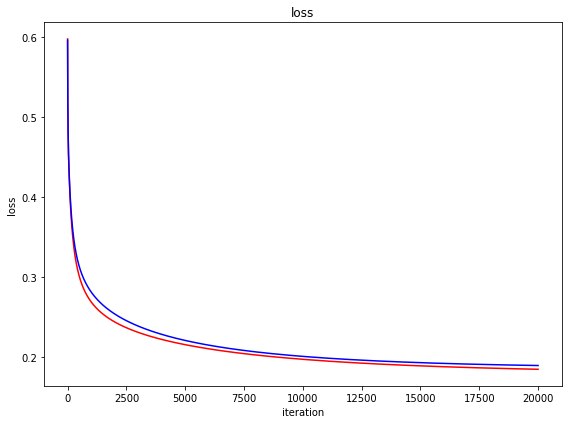

In [69]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

In [74]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.plot(accuracy_iteration_test, '-', color='blue')
    

    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

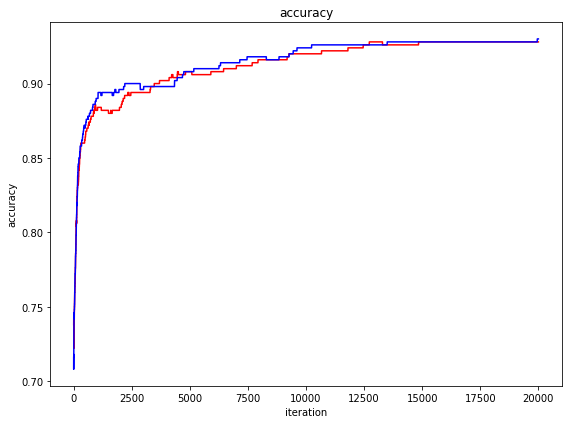

In [75]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

In [76]:
def plot_data(data_train, data_test):
    
    x_1_0 = np.zeros(250)
    y_1_0 = np.zeros(250)
    for i in range(250):
        x_1_0[i] = data_train[i][0]
        y_1_0[i] = data_train[i][1]
    x_1_1 = np.zeros(250)
    y_1_1 = np.zeros(250)
    for i in range(250):
        x_1_1[i] = data_train[i+250][0]
        y_1_1[i] = data_train[i+250][1]

    x_2_0 = np.zeros(250)
    y_2_0 = np.zeros(250)
    for i in range(250):
        x_2_0[i] = data_test[i][0]

        y_2_0[i] = data_test[i][1]
    x_2_1 = np.zeros(250)
    y_2_1 = np.zeros(250)
    for i in range(250):
        x_2_1[i] = data_test[i+250][0]
        y_2_1[i] = data_test[i+250][1]
    plt.figure(figsize=(16,8))

    plt.subplot(121)
    plt.plot(x_1_0, y_1_0,'.', color='blue', label = 'class = 0')
    plt.plot(x_1_1, y_1_1,'.', color='red', label = 'class = 1')
    plt.legend()

    plt.subplot(122)
    plt.plot(x_2_0, y_2_0, '.', color = 'blue', label = 'class = 0')
    plt.plot(x_2_1, y_2_1, '.', color = 'red', label = 'class = 1')
    plt.legend()




plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [80]:

def plot_model_parameter(theta_iteration):


    theta0_iteration = np.zeros(20000)
    theta1_iteration = np.zeros(20000)
    theta2_iteration = np.zeros(20000)
    theta3_iteration = np.zeros(20000)
    theta4_iteration = np.zeros(20000)
    theta5_iteration = np.zeros(20000)
    
    for i in range(20000):
        theta0_iteration[i] = theta_iteration[i][0]
        theta1_iteration[i] = theta_iteration[i][1]
        theta2_iteration[i] = theta_iteration[i][2]
        theta3_iteration[i] = theta_iteration[i][3]
        theta4_iteration[i] = theta_iteration[i][4]
        theta5_iteration[i] = theta_iteration[i][5]
            
            
    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(theta0_iteration, '-', color='red', label = 'theta0')
    plt.plot(theta1_iteration, '-', color='green', label = 'theta1')
    plt.plot(theta2_iteration, '-', color='blue', label = 'theta2')
    plt.plot(theta3_iteration, '-', color='yellow', label = 'theta3')
    plt.plot(theta4_iteration, '-', color='orange', label = 'theta4')
    plt.plot(theta5_iteration, '-', color='black', label = 'theta5')

    plt.xlabel('iteration')
    plt.legend(loc="center right")
    plt.tight_layout()
    plt.show()

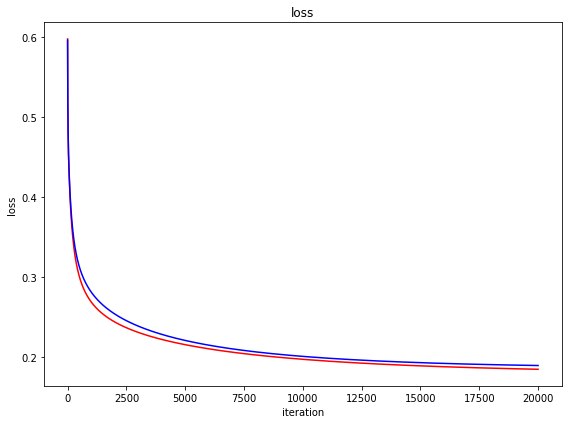

In [81]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

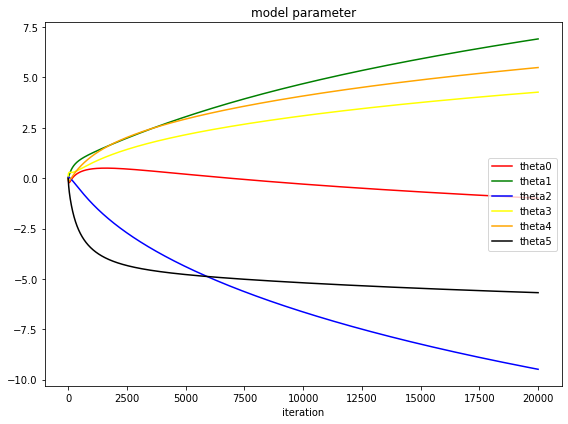

In [82]:
plot_model_parameter(theta_iteration)

In [94]:
X0  = np.arange(-2,4, 0.1)
X1  = np.arange(-1,3, 0.1)
XX,YY = np.meshgrid(X0, X1)

ZZ = theta_optimal[0] +theta_optimal[1] * XX + theta_optimal[2] * (XX**2)+ theta_optimal[3] * (XX**3)+ theta_optimal[4] * (np.cos(XX))+ theta_optimal[5] * (YY)

In [95]:
def plot_classifier(XX,YY,ZZ, data):
    x_0 = np.zeros(250)
    y_0 = np.zeros(250)
    for i in range(250):
        x_0[i] = data[i][0]
        y_0[i] = data[i][1]
    x_1 = np.zeros(250)
    y_1 = np.zeros(250)
    for i in range(250):
        x_1[i] = data[i+250][0]
        y_1[i] = data[i+250][1]
    plt.figure(figsize=(8,8))
    plt.axis('equal')
    plt.contourf(XX, YY, ZZ, levels = np.linspace(ZZ.min(), ZZ.max()),cmap="RdBu_r")
    plt.colorbar()
    plt.contour(XX,YY,ZZ,levels=0, linewidths=1, colors='k')

    plt.plot(x_0, y_0,'.', color='blue', label = 'class = 0')
    plt.plot(x_1, y_1,'.', color='red', label = 'class = 1')
    plt.legend()

    plt.tight_layout()
    plt.show()

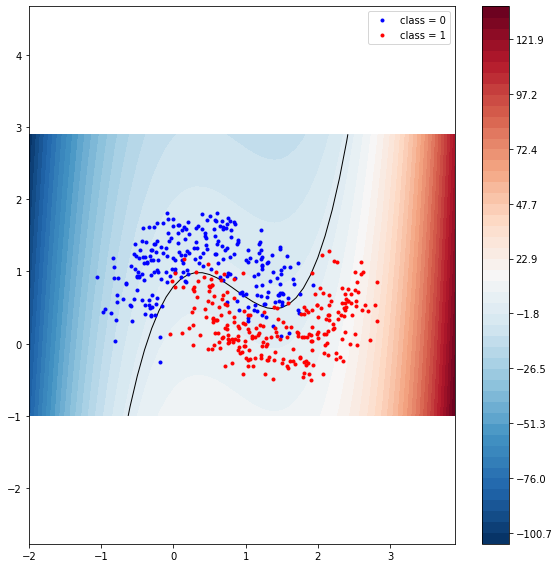

In [96]:
plot_classifier(XX,YY,ZZ, data_train)

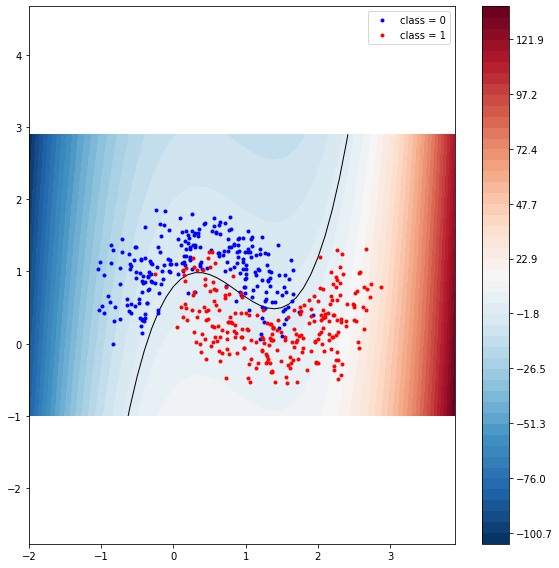

In [97]:
plot_classifier(XX,YY,ZZ, data_test)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

In [ ]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

In [ ]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

In [ ]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

In [ ]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

In [ ]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

In [ ]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [ ]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

소수 5자리까지 accuracy 표혀ㅑㄴ